##### SGD 확률경사하강법(1)

In [48]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi,100)
y = np.sin(X) # + np.random.randn(100)
# np.linspace ^ 정해진 구간을 균등하게 나눈 값들을 생성하는 NumPy 메소드

In [49]:
X[1] - X[0], X[2] -X[1], np.random.randn(100) # 노이즈 추가

(np.float64(0.06346651825433947),
 np.float64(0.06346651825433902),
 array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.196206

In [50]:
# 가중치 초기값
a,b,c,d  = 0.,0.,0.,0.
eta = 1e-3 # learning rate 0.001
           # 이 수치가 적당하게 설정해주는 게 좋다.
           # 보편적으로 learing rate는 1e-3으로 한다.
           # 너무 수치가 크면 오차가 늘어나고, 너무 수치가 작으면 과적합의 위험이 있다.
epochs = 5000 

# 하이퍼 파리미터 지정? ^

###### 모델의 출력(예측) : y_hat = ax**3 + bx**2 +bx + d
###### 오차 : e = y - y_hat
###### 손실함수
###### 전체 손실량 L 을 구하는 수식 mse(L) =  1/n*sum((y - y_hat)**2)
```
직접적으로 a의 변화량과 L의 변화량은 연관이 없다.
그걸 오차 e를 통해 연쇄법칙으로 계산한다. ^
```

![화면 캡처 2025-10-30 092157.png](<attachment:화면 캡처 2025-10-30 092157.png>)
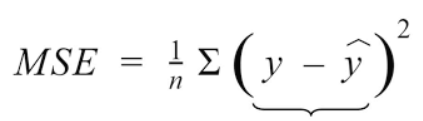

In [51]:
# 학습과정 기록 : 손실값, 파라미터의 값 기록
mse_history = np.zeros(epochs) # epoch 갯수만큼의 틀 생성
parameter_history = np.zeros((epochs,4))

- 기울기 DL / Delta(seta - a,b,c,d 중에 하나) 손실 L이 y_hat을 통해 seta에 의존 연쇄법칙이 가능
```
    델타 : 변화량
    세타 : 모델의 파라미터, 계수
```
- 편미분 a로 편미분 x**3
- 편미분 b로 편미분 x**2
- 편미분 c로 편미분 x
- 편미분 d로 편미분 1

- 기울기 a 2(y-y_hat)*x**3
- 기울기 b 2(y-y_hat)*x**2
- 기울기 c 2(y-y_hat)*x
- 기울기 d 2(y-y_hat)*1

In [52]:
for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat

    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse

    # gradient
        # 이부분을 torch가 내부적으로 해준다.
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e*1)
    # - 를 붙인 이유 ^

    # update
    a -= eta*2*da
    b -= eta*2*db
    c -= eta*2*dc
    d -= eta*2*dd
    # 빼기로 갱신하는 이유 ^

    parameter_history[epoch] = [a,b,c,d]

# 최종결과
print(a,b,c,d,mse)

-0.09165604777707692 2.0108726069584627e-17 0.8478358282593335 -5.54225094912501e-17 0.0047661861965792056


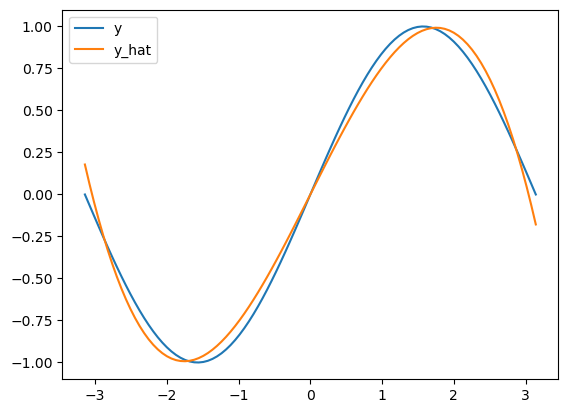

In [53]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat, label='y_hat')
plt.legend()
plt.show()

##### SGD 확률경사 하강법(2)
- 텐서로 변경 후 자동미분 사용
- 옵티마이저 수동 실행

In [54]:
# 텐서로 변경 - 자동 미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi,np.pi,100)
y = torch.sin(X)

a = torch.tensor(0.,requires_grad=True)
b = torch.tensor(0.,requires_grad=True)
c = torch.tensor(0.,requires_grad=True)
d = torch.tensor(0.,requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros((epochs, 4))
for epoch in range(epochs):
    # 모델
        # forward 모델 부분
    y_hat = a*X**3 + b*X**2 + c*X + d
    # 오차
    loss = torch.mean((y - y_hat)**2)
    # Stochastic Gradient Descent
    # Batch Gradient Descent
    loss.backward()
    mse_history[epoch] = mse.item()
    # 역전파 - 수동
        # 옵티마이저 부분 수동으로 작성
    with torch.no_grad(): # 메모리측면에서 기록을 안한다.
        a -= eta*2*a.grad
        b -= eta*2*b.grad
        c -= eta*2*c.grad
        d -= eta*2*d.grad
    # 그레디언트 초기화
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_(); d.grad.zero_()
    parameter_history[epoch] = [a.item(),b.item(),c.item(),d.item()]

# 최종결과 출력 ^

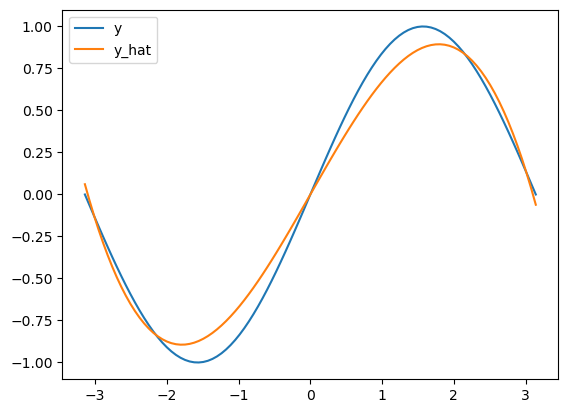

In [55]:
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()

##### Adam
- Momentum + RMSProp 결합

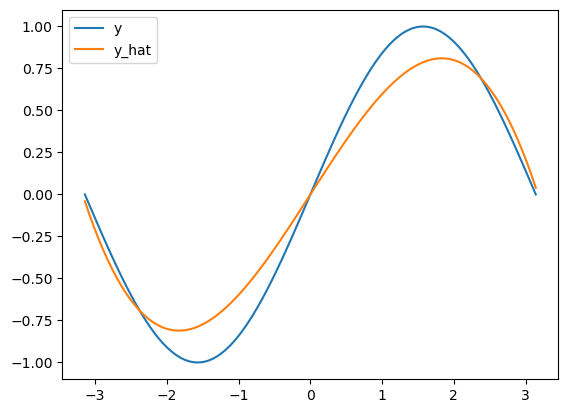

In [58]:
from torch.optim import Adam
import torch
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

optim = Adam([ a,b,c,d], lr=eta)

for epoch in range(epochs):
    optim.zero_grad()

    y_hat = a*X**3 + b*X**2 + c*X + d
    
    e = y - y_hat
    mse = torch.mean(e**2)
    mse.backward()
    optim.step()

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat') # .detach().numpy() ^
plt.legend()
plt.show()

##### (2)-1 직접 가중치 최적화를 통한 다항 회귀 구현

In [ ]:
# Xsetha = [X^3, X^2, X, 1]
# w = [a,b,c,d]
# y_hat = Xsetha dot w

In [59]:
torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1).size()

torch.Size([100, 4])

0.004755878355354071


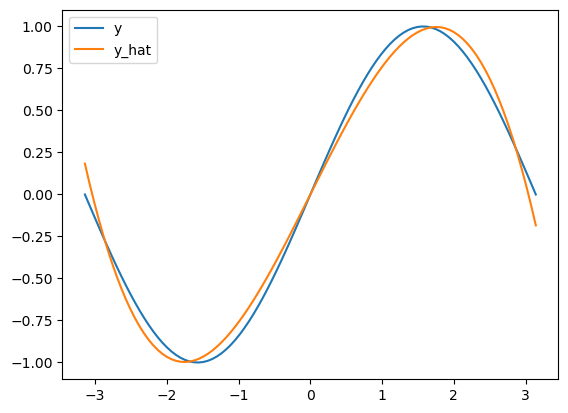

In [66]:
from torch.optim import Adam
import torch
import numpy as np
import torch.nn as nn

torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

eta = 1e-3
epochs = 5000

# 기저함수 행렬 (100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1)
# 가중치 벡터
w = torch.tensor([0. , 0. , 0. , 0.], requires_grad=True)
# 가중치 적용
optim = Adam([w], lr=eta)
# 손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    
    y_hat = X_theta@w  # (100,4) $ (4,)  =  (100,)

    e  = y-y_hat
    mse = torch.mean(e**2)
    
    loss = criterion(y_hat, y)
    loss.backward()
    optim.step()
print(loss.item())
    
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()    

##### (2)-2 PyTorch nn.Linear 모듈을 활용한 다항 회귀 구현

In [ ]:
# 가중치를 부여하지 않는 방법

# 기존 딥러닝의 방법
# X텐서이고 100,4 형태로 제공
# 각 차숭 대응하는 가중치를 정하여
# 내적연산을 하여 예측
# 예측에 대한 오차를 구해 - 손실함수
# 오차를 최소화할 수 있는 기울기를 계산
# 업데이트해서 다음 계산에 업데이트된 가중치를 사용 - 이 과정을 epochs 만큼 반봅

0.005082880146801472


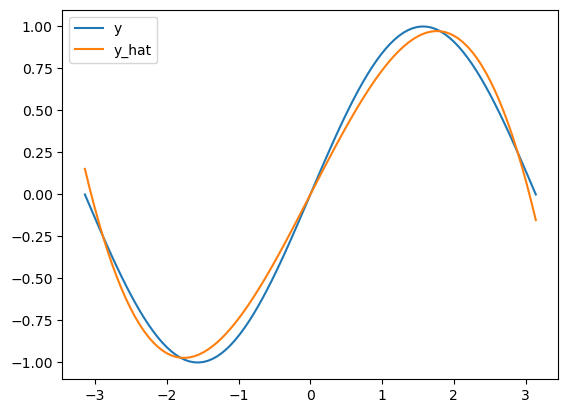

In [67]:
from torch.optim import Adam
import torch
import numpy as np
import torch.nn as nn

torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

eta = 1e-3
epochs = 1000

# 하이퍼파라메터
eta = 1e-3
epochs = 5000

# 기저함수 행렬 (100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X) ],dim=1)

# 모델 생성
model = nn.Linear(4,1,bias=True)

# 가중치 적용
optim = Adam(model.parameters(), lr=eta)

# 손실함수
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    optim.zero_grad()
    
    y_hat = model(X_theta).squeeze()
    loss = criterion(y_hat, y)
    loss.backward()
    optim.step()
print(loss.item())

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat.detach().numpy(), label='y_hat')
plt.legend()
plt.show()    

```
단순 문제에서는 단순 코드(2)-1가 최적화에 유리할 수 있고,
복잡 문제에서는 PyTorch 모듈 기반 접근(2)2이 더 안정적
```

In [ ]:
# 뇌적 연산?

In [ ]:
#

In [ ]:
# np.stack - axis
# torch.stack - dim